In [21]:
import pandas as pd
import plotnine as p9


In [22]:
# Read csv(s)
q1D = pd.read_csv("Data/q1data.csv")
print("-------Q1Data----------")
print(q1D.columns)

q2D = pd.read_csv("Data/q2data.csv")
print("-------Q2Data----------")
print(q2D.columns)

q3D = pd.read_csv("Data/q3data.csv")
print("-------Q3Data----------")
print(q3D.columns)

-------Q1Data----------
Index(['income', 'life_exp', 'population', 'year', 'country', 'four_regions',
       'six_regions', 'eight_regions', 'world_bank_region'],
      dtype='object')
-------Q2Data----------
Index(['imports', 'exports', 'energy', 'year', 'country', 'four_regions',
       'six_regions', 'eight_regions', 'world_bank_region'],
      dtype='object')
-------Q3Data----------
Index(['internet_users', 'gdp', 'income', 'year', 'country', 'four_regions',
       'six_regions', 'eight_regions', 'world_bank_region'],
      dtype='object')


# Task 1

In [23]:
print(q1D.dtypes)

income               float64
life_exp             float64
population           float64
year                   int64
country               object
four_regions          object
six_regions           object
eight_regions         object
world_bank_region     object
dtype: object


C:\Users\navsa\AppData\Local\Programs\Python\Python313\Lib\site-packages\plotnine\layer.py:372: PlotnineWarning: geom_point : Removed 11 rows containing missing values.


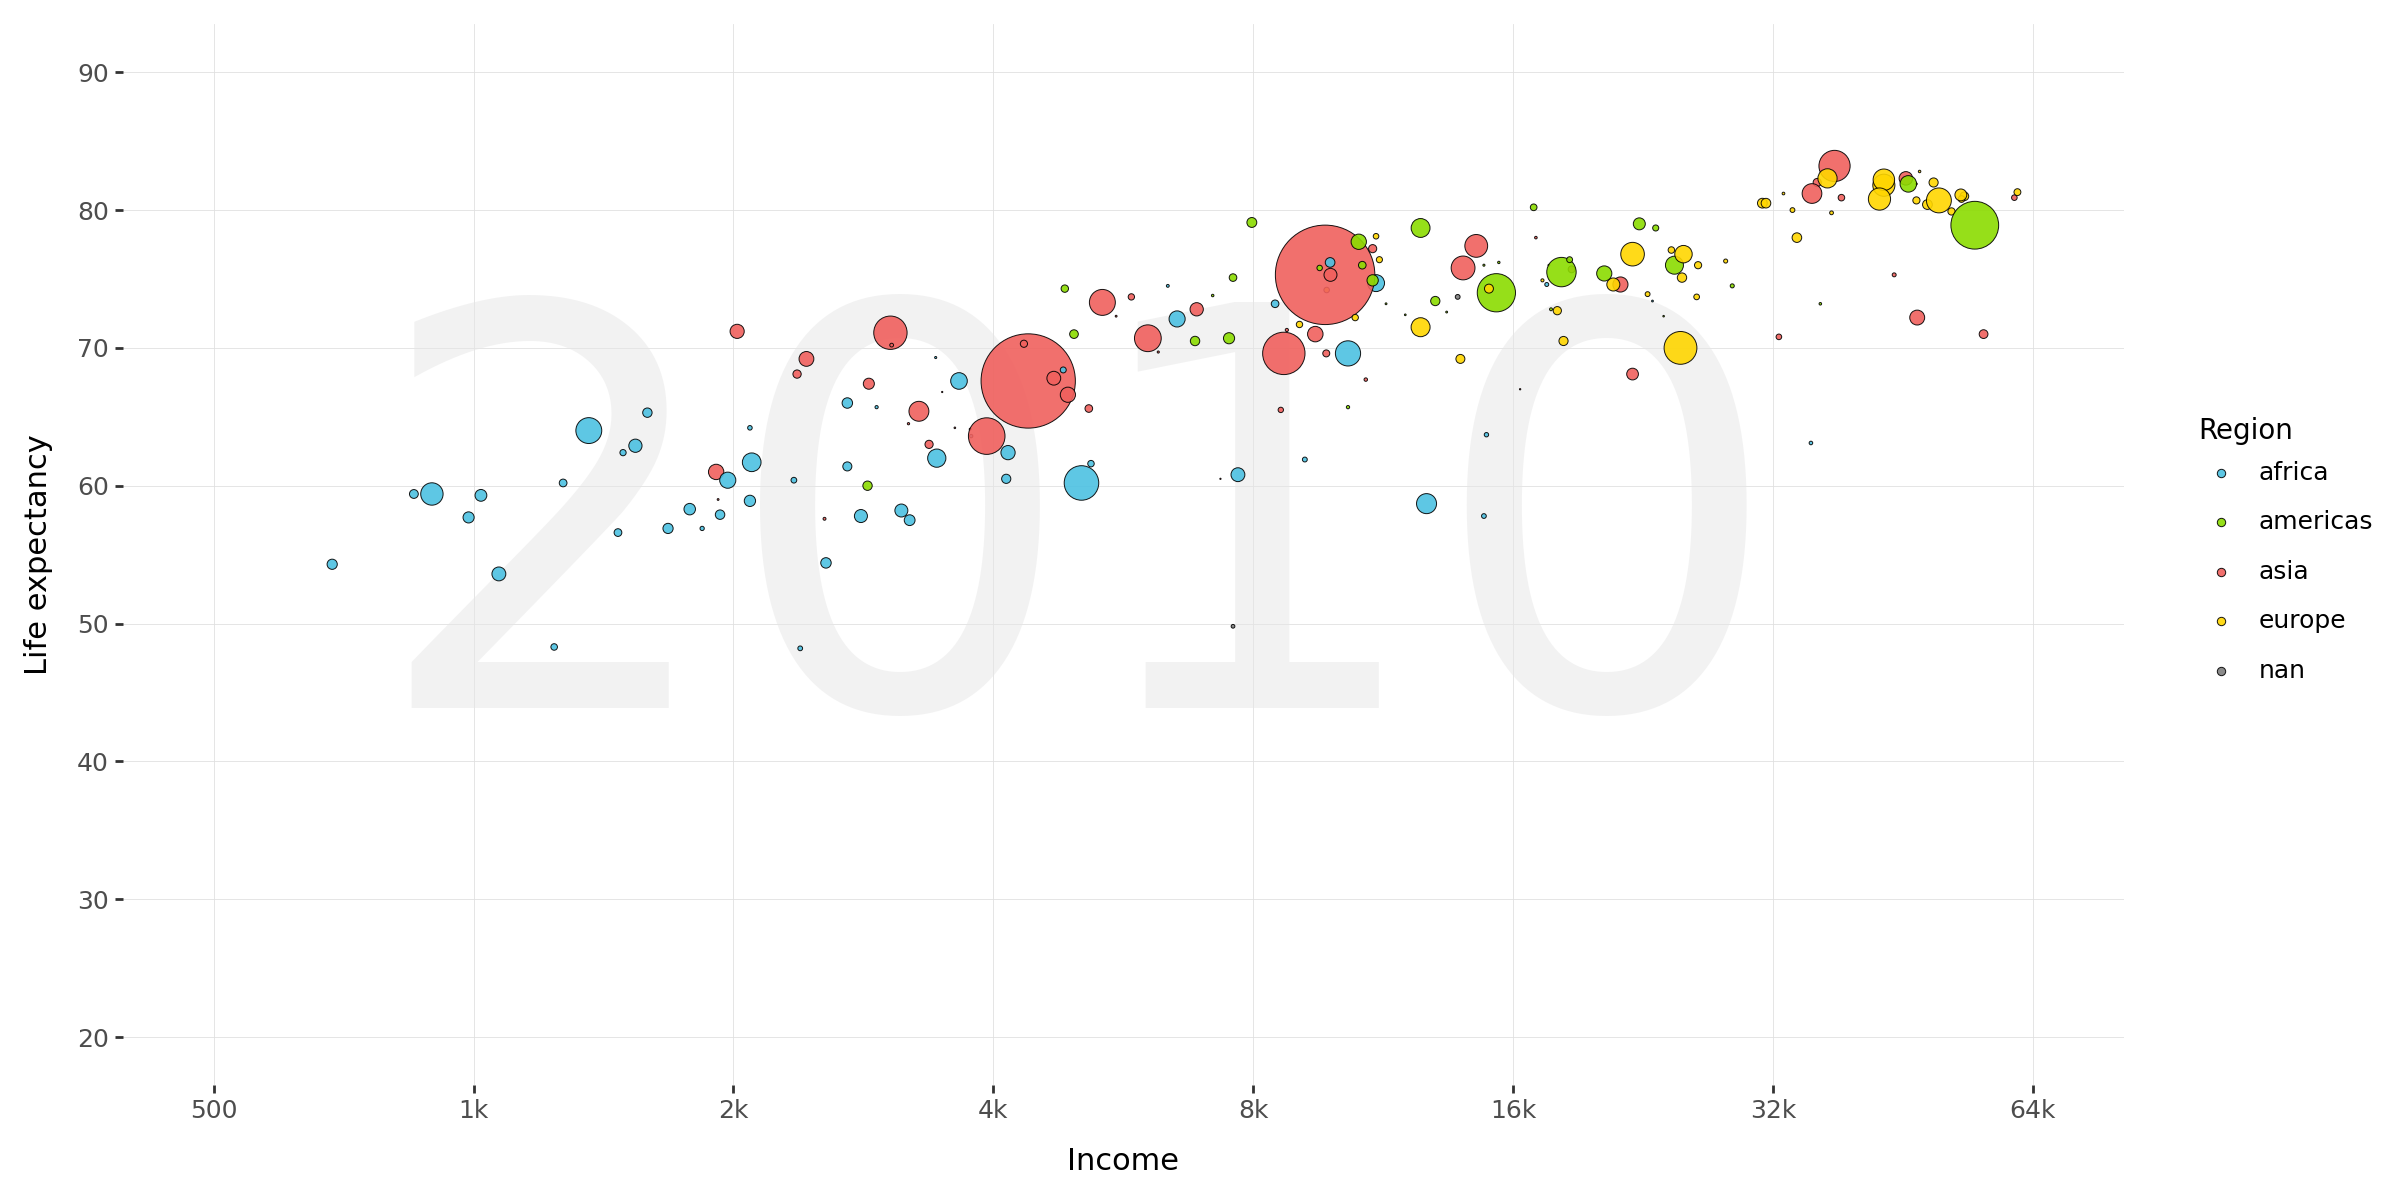

In [24]:
plotBubble = (
    p9.ggplot(q1D, p9.aes(x="income", y="life_exp", size="population"))
    # big faded year in the middle
    + p9.annotate("text", x=5000, y=55, label="2010", size=200,
                  color="#e6e6e6", alpha=0.5, ha="center", va="center")

    + p9.geom_point(
        p9.aes(fill="four_regions"),
        shape="o",                     
        color="black",                 
        stroke=0.2,                    
        alpha=0.9
    )
    + p9.scale_size_area(max_size=20)
    + p9.guides(size=False)

    + p9.scale_fill_manual(values={
        "asia":    "#f0605d",  # coral red
        "europe":  "#ffd600",  # bright yellow
        "americas":"#8bdc00",  # lime green
        "africa":  "#4cc1e2"   # cyan blue
    })
    # axes like the Gapminder view
    + p9.scale_x_log10(
        limits=(500, 64000),
        breaks=[500, 1000, 2000, 4000, 8000, 16000, 32000, 64000],
        labels=["500", "1k", "2k", "4k", "8k", "16k", "32k", "64k"]
    )

    + p9.scale_y_continuous(
    limits=(20, 90),
    breaks=[20,30,40,50,60,70,80,90]
    )

    + p9.labs(x="Income", y="Life expectancy", fill="Region")
    + p9.theme(
        figure_size=(12, 6),
        panel_background=p9.element_rect(fill="white"),
        panel_grid_major=p9.element_line(color="#e0e0e0", size=0.3),
        panel_grid_minor=p9.element_blank(),
        axis_title=p9.element_text(size=11),
        axis_text=p9.element_text(size=9),
        legend_title=p9.element_text(size=10),
        legend_text=p9.element_text(size=9),
        legend_position="right"
    )
)

plotBubble.show()


C:\Users\navsa\AppData\Local\Programs\Python\Python313\Lib\site-packages\plotnine\layer.py:372: PlotnineWarning: geom_point : Removed 9 rows containing missing values.


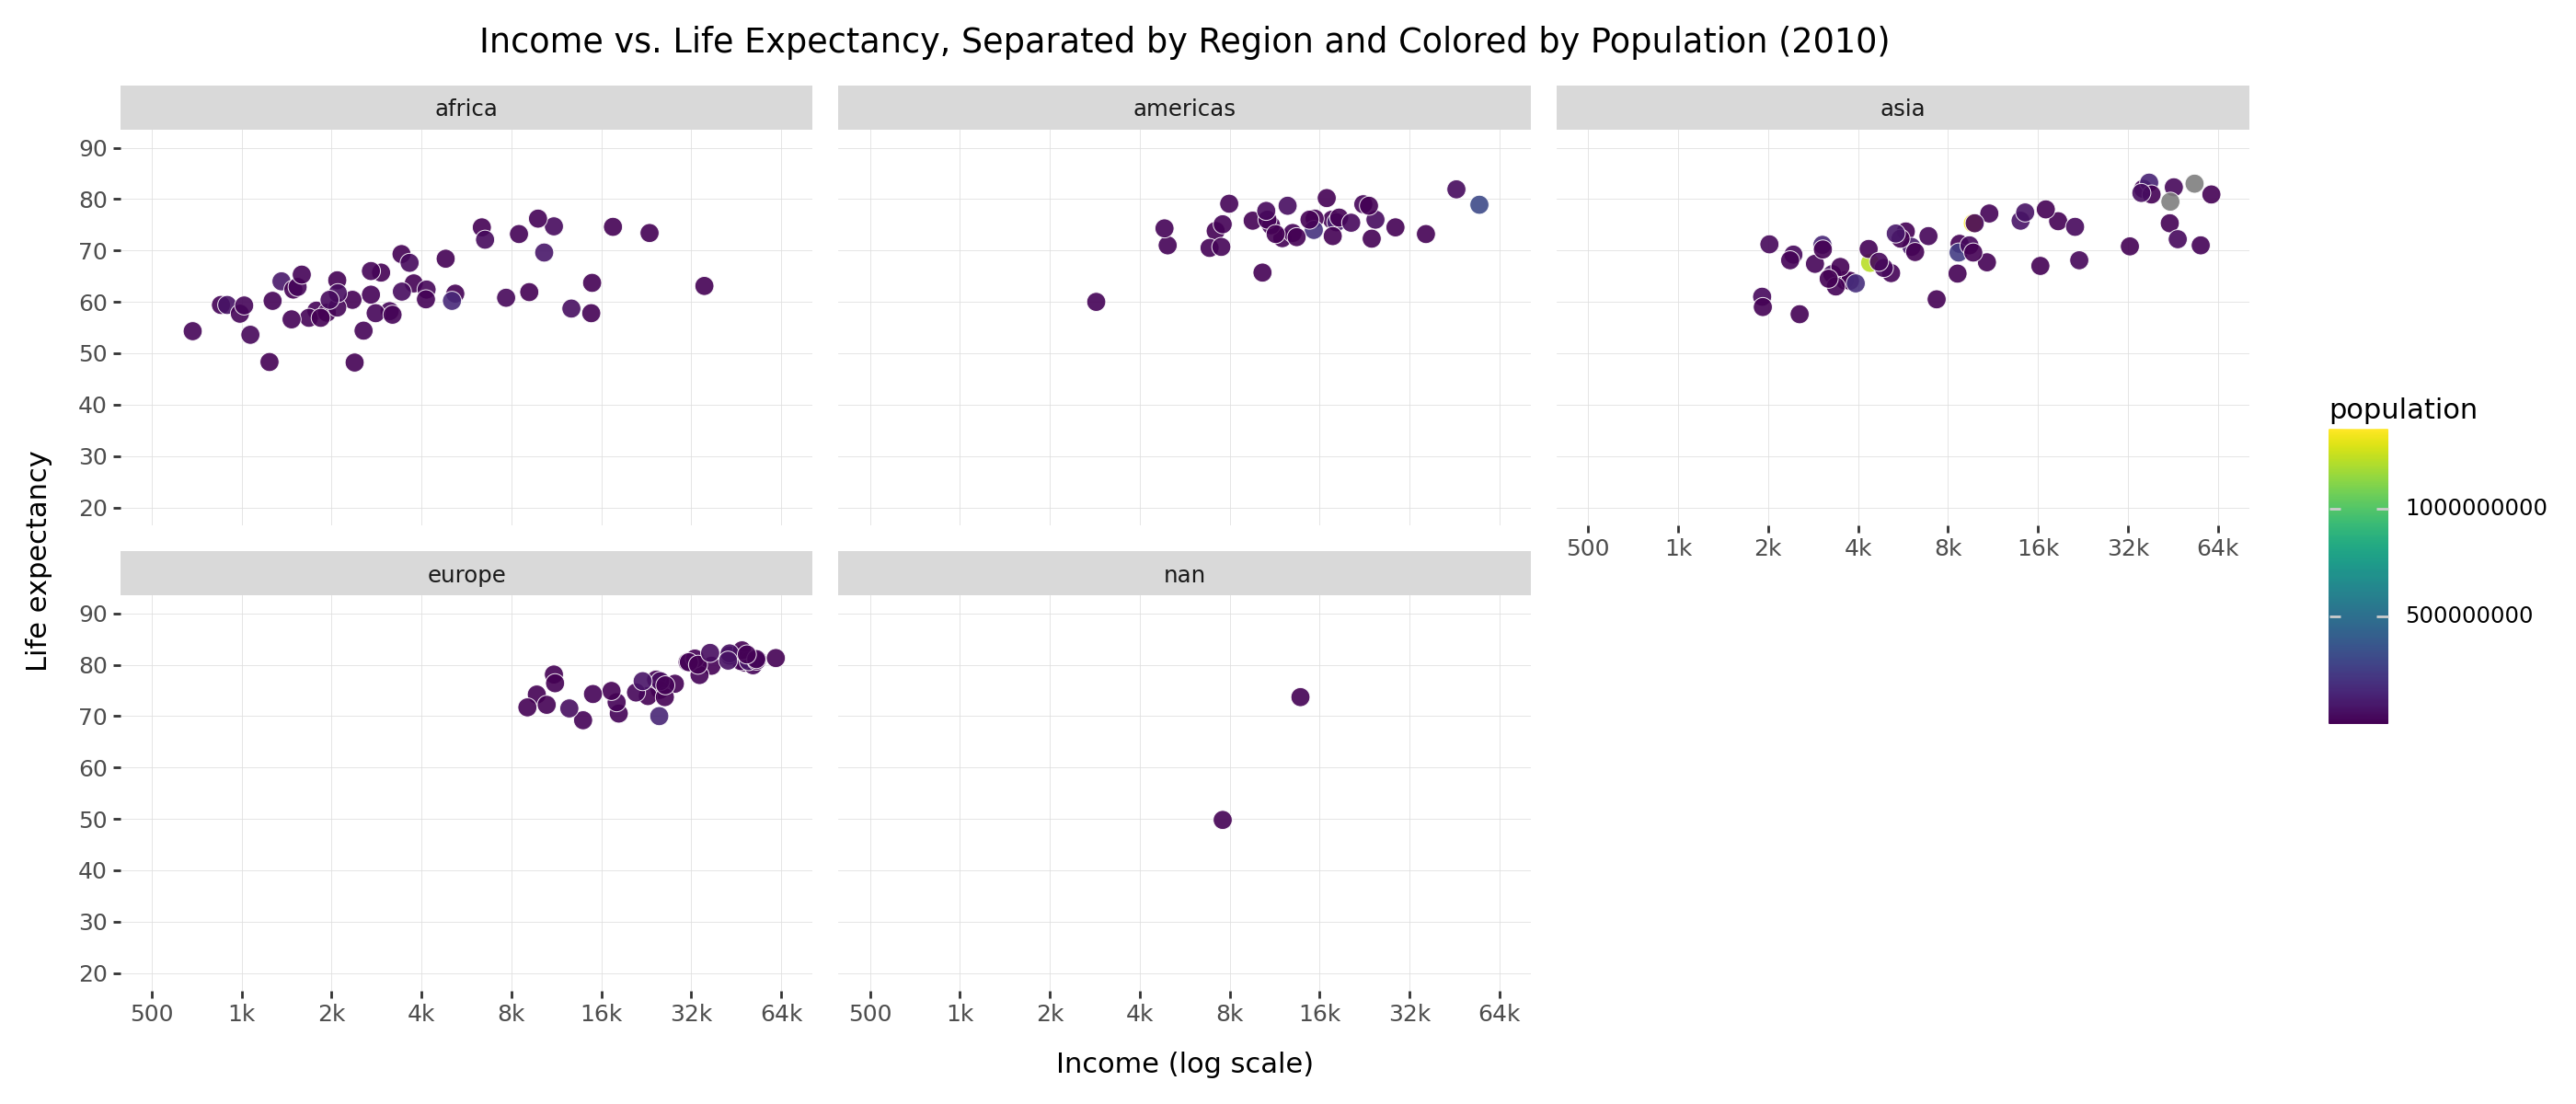

In [25]:
plotAlternative = (
    p9.ggplot(q1D, p9.aes(x="income", y="life_exp")) # Removed 'size' aesthetic

    # Use geom_point, mapping 'population' to the color aesthetic
    + p9.geom_point(
        p9.aes(fill="population"), # Color now represents Population
        size=4,                     # Fixed size for all points
        shape="o",
        color="white",
        stroke=0.2,
        alpha=0.9
    )

    # Facet the plot by the 'four_regions' variable
    + p9.facet_wrap("four_regions")

    # Use a sequential color scale for the 'population' variable
    + p9.scale_color_cmap(
        cmap_name='inferno',  # A good dark-to-light, perceptually uniform map
        limits=(q1D['population'].min(), q1D['population'].max()),
        name='Population'
    )
    
    # Original axes and labels are maintained
    + p9.scale_x_log10(
        limits=(500, 64000),
        breaks=[500, 1000, 2000, 4000, 8000, 16000, 32000, 64000],
        labels=["500", "1k", "2k", "4k", "8k", "16k", "32k", "64k"]
    )

    + p9.scale_y_continuous(
        limits=(20, 90),
        breaks=[20,30,40,50,60,70,80,90]
    )

    + p9.labs(
        x="Income (log scale)", 
        y="Life expectancy",
        title="Income vs. Life Expectancy, Separated by Region and Colored by Population (2010)"
    )

    # Simplify theme
    + p9.theme(
        figure_size=(14, 6),  # Adjusted size to fit facets
        panel_background=p9.element_rect(fill="white"),
        panel_grid_major=p9.element_line(color="#e0e0e0", size=0.3),
        panel_grid_minor=p9.element_blank(),
        axis_title=p9.element_text(size=11),
        axis_text=p9.element_text(size=9),
        legend_position="right",
    )
)

plotAlternative.show()

### Good
Facets make regions easier to compare internally.

### Bad
Using color for population is harder to read than bubble size, and population is so skewed that most countries blur together. Better with size or a log transform.

# Task 2

In [26]:
print(q2D.dtypes)

print(q2D.head)

imports              float64
exports              float64
energy                object
year                   int64
country               object
four_regions          object
six_regions           object
eight_regions         object
world_bank_region     object
dtype: object
<bound method NDFrame.head of      imports  exports energy  year                country four_regions  \
0        NaN      NaN    NaN  1997            Afghanistan         asia   
1       36.7     11.5    427  1997                Albania       europe   
2       22.5     22.6    825  1997                Algeria       africa   
3        NaN      NaN    NaN  1997         American Samoa          NaN   
4        NaN      NaN    434  1997                 Angola       africa   
..       ...      ...    ...   ...                    ...          ...   
201     52.2     44.8    340  1997                Vietnam         asia   
202      NaN      NaN    NaN  1997  Virgin Islands (U.S.)          NaN   
203      NaN      NaN    241 

In [27]:
for col in ["exports", "imports", "energy"]:
    q2D[col] = pd.to_numeric(q2D[col], errors="coerce")

C:\Users\navsa\AppData\Local\Programs\Python\Python313\Lib\site-packages\plotnine\layer.py:372: PlotnineWarning: geom_point : Removed 80 rows containing missing values.


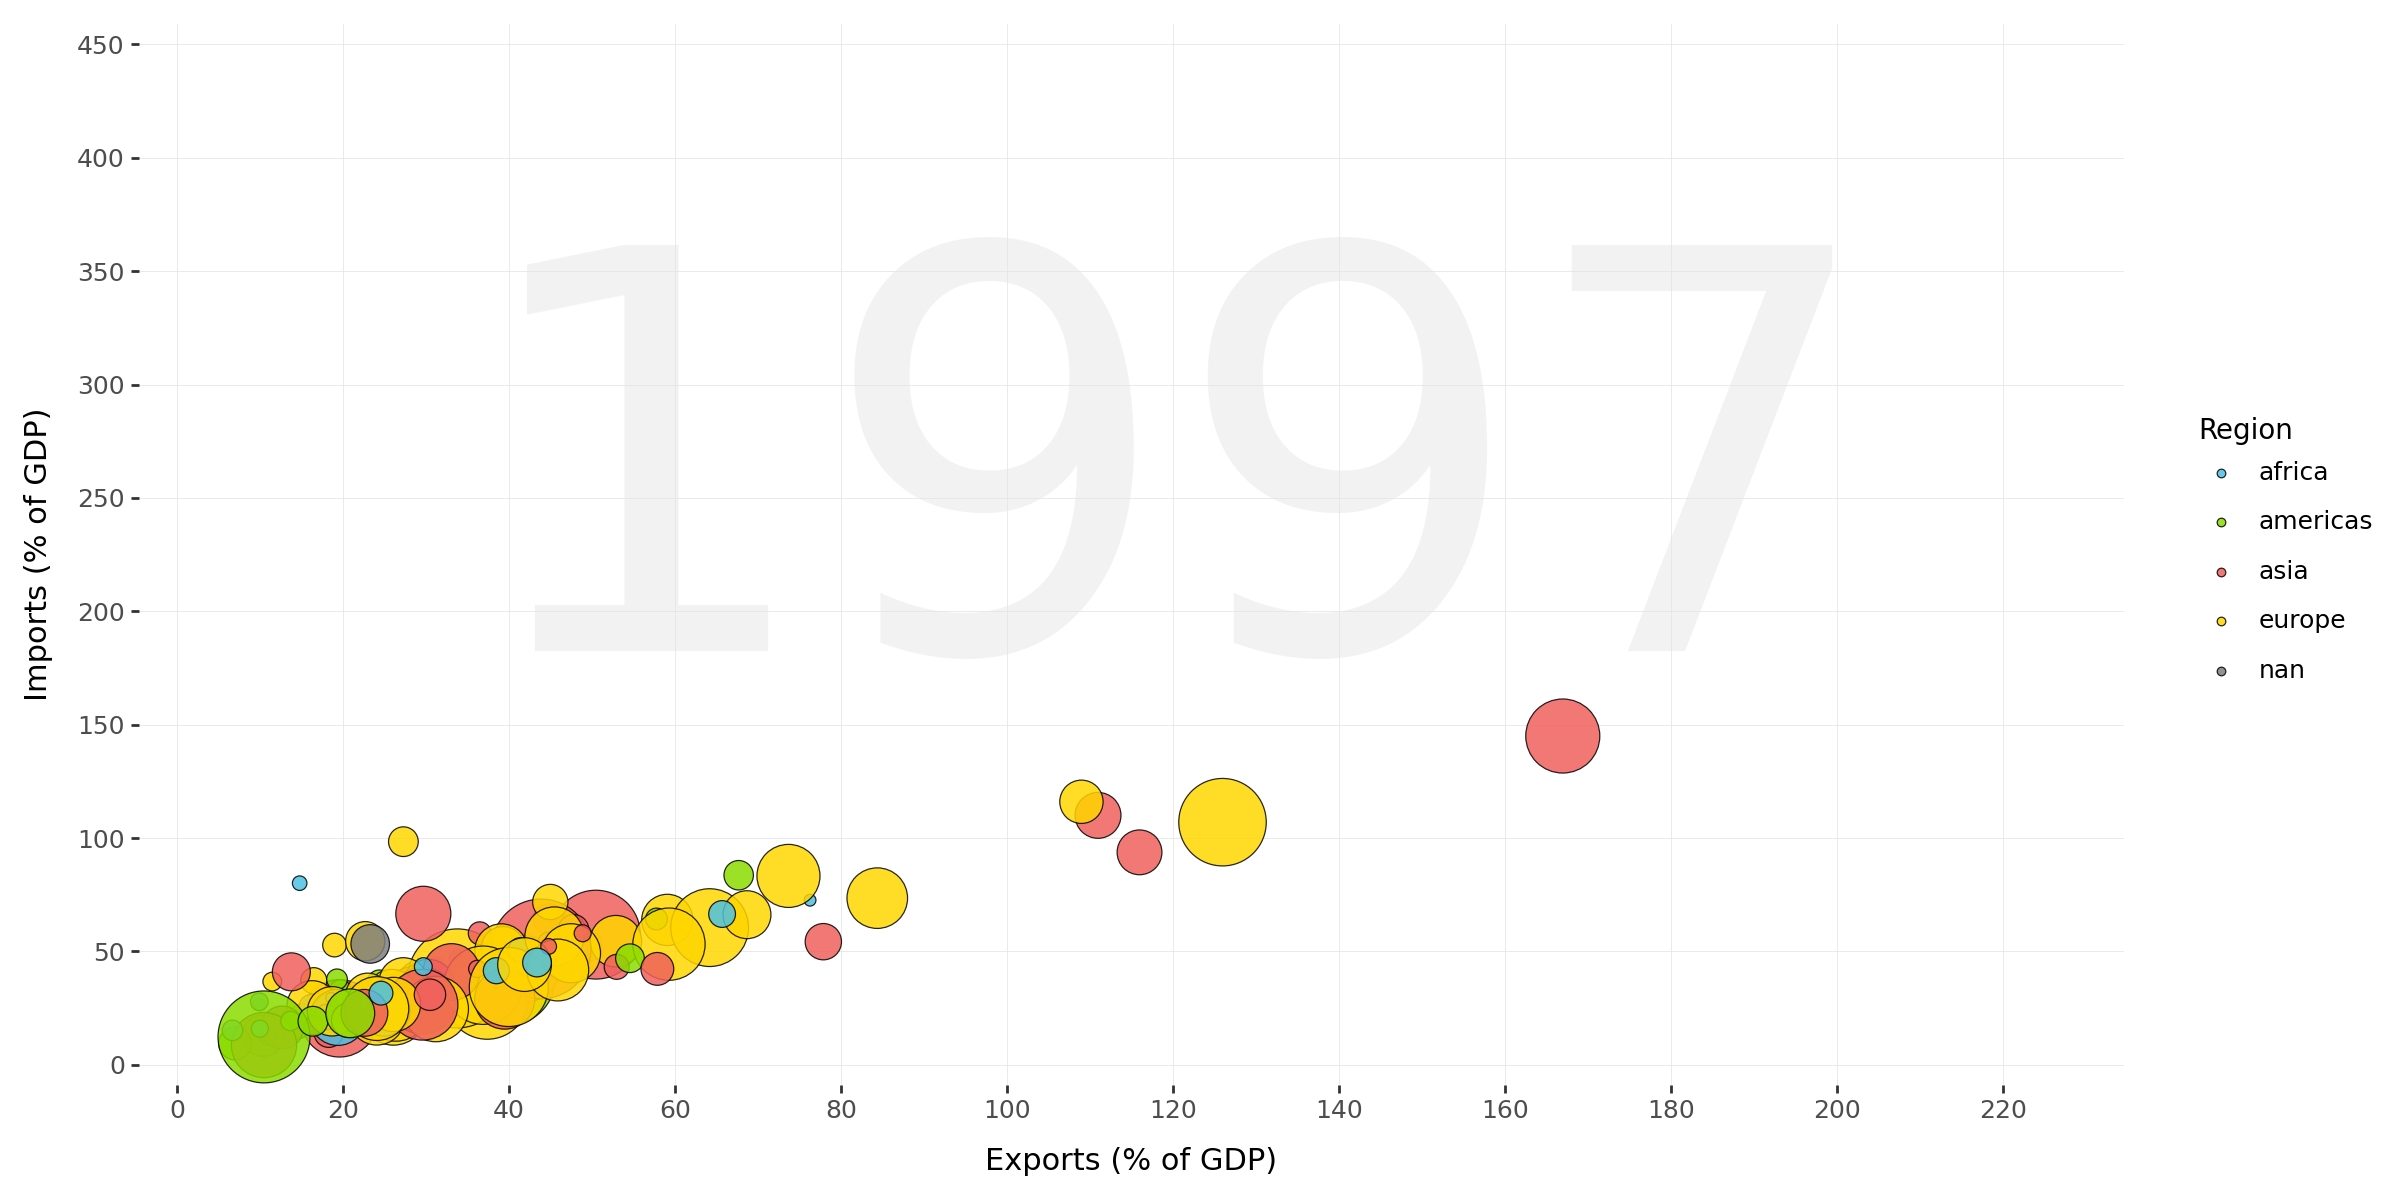

In [28]:
plotBubble = (
    p9.ggplot(q2D, p9.aes(x="exports", y="imports", size="energy"))

    #The higher the placement in ggplot the lower the layer
    + p9.annotate("text", x=120, y=250, label="1997", size=200,
                  color="#e6e6e6", alpha=0.5, ha="center", va="center")

    + p9.geom_point(
        p9.aes(fill="four_regions"),   # interior color by region
        shape="o",                     # filled circle
        color="black",                 # outline
        stroke=0.25,
        alpha=0.85
    )
    + p9.scale_size_area(max_size=20)
    + p9.guides(size=False)  # hide size legend
    + p9.labs(
        x="Exports (% of GDP)",
        y="Imports (% of GDP)",
        fill="Region"
    )
    + p9.scale_fill_manual(values={
        "asia":    "#f0605d",  # coral red
        "europe":  "#ffd600",  # bright yellow
        "americas":"#8bdc00",  # lime green
        "africa":  "#4cc1e2"   # cyan blue
    })
    + p9.scale_x_continuous(
        limits=(0, 230),   # start at 0, not 5
        breaks=[0,20,40,60,80,100,120,140,160,180,200,220],
        expand=(0.02, 0.02)   # small padding to avoid cuts
    )
    + p9.scale_y_continuous(
        limits=(0, 450),
        breaks=[0,50,100,150,200,250,300,350,400,450],
        expand=(0.02, 0.02)
    )

    + p9.theme(
        figure_size=(12, 6),
        panel_background=p9.element_rect(fill="white"),
        panel_grid_major=p9.element_line(color="#e6e6e6", size=0.3),
        panel_grid_minor=p9.element_blank(),
        axis_title=p9.element_text(size=11),
        axis_text=p9.element_text(size=9),
        legend_title=p9.element_text(size=10),
        legend_text=p9.element_text(size=9)
    )
)

plotBubble.show()

C:\Users\navsa\AppData\Local\Programs\Python\Python313\Lib\site-packages\plotnine\layer.py:372: PlotnineWarning: geom_point : Removed 35 rows containing missing values.


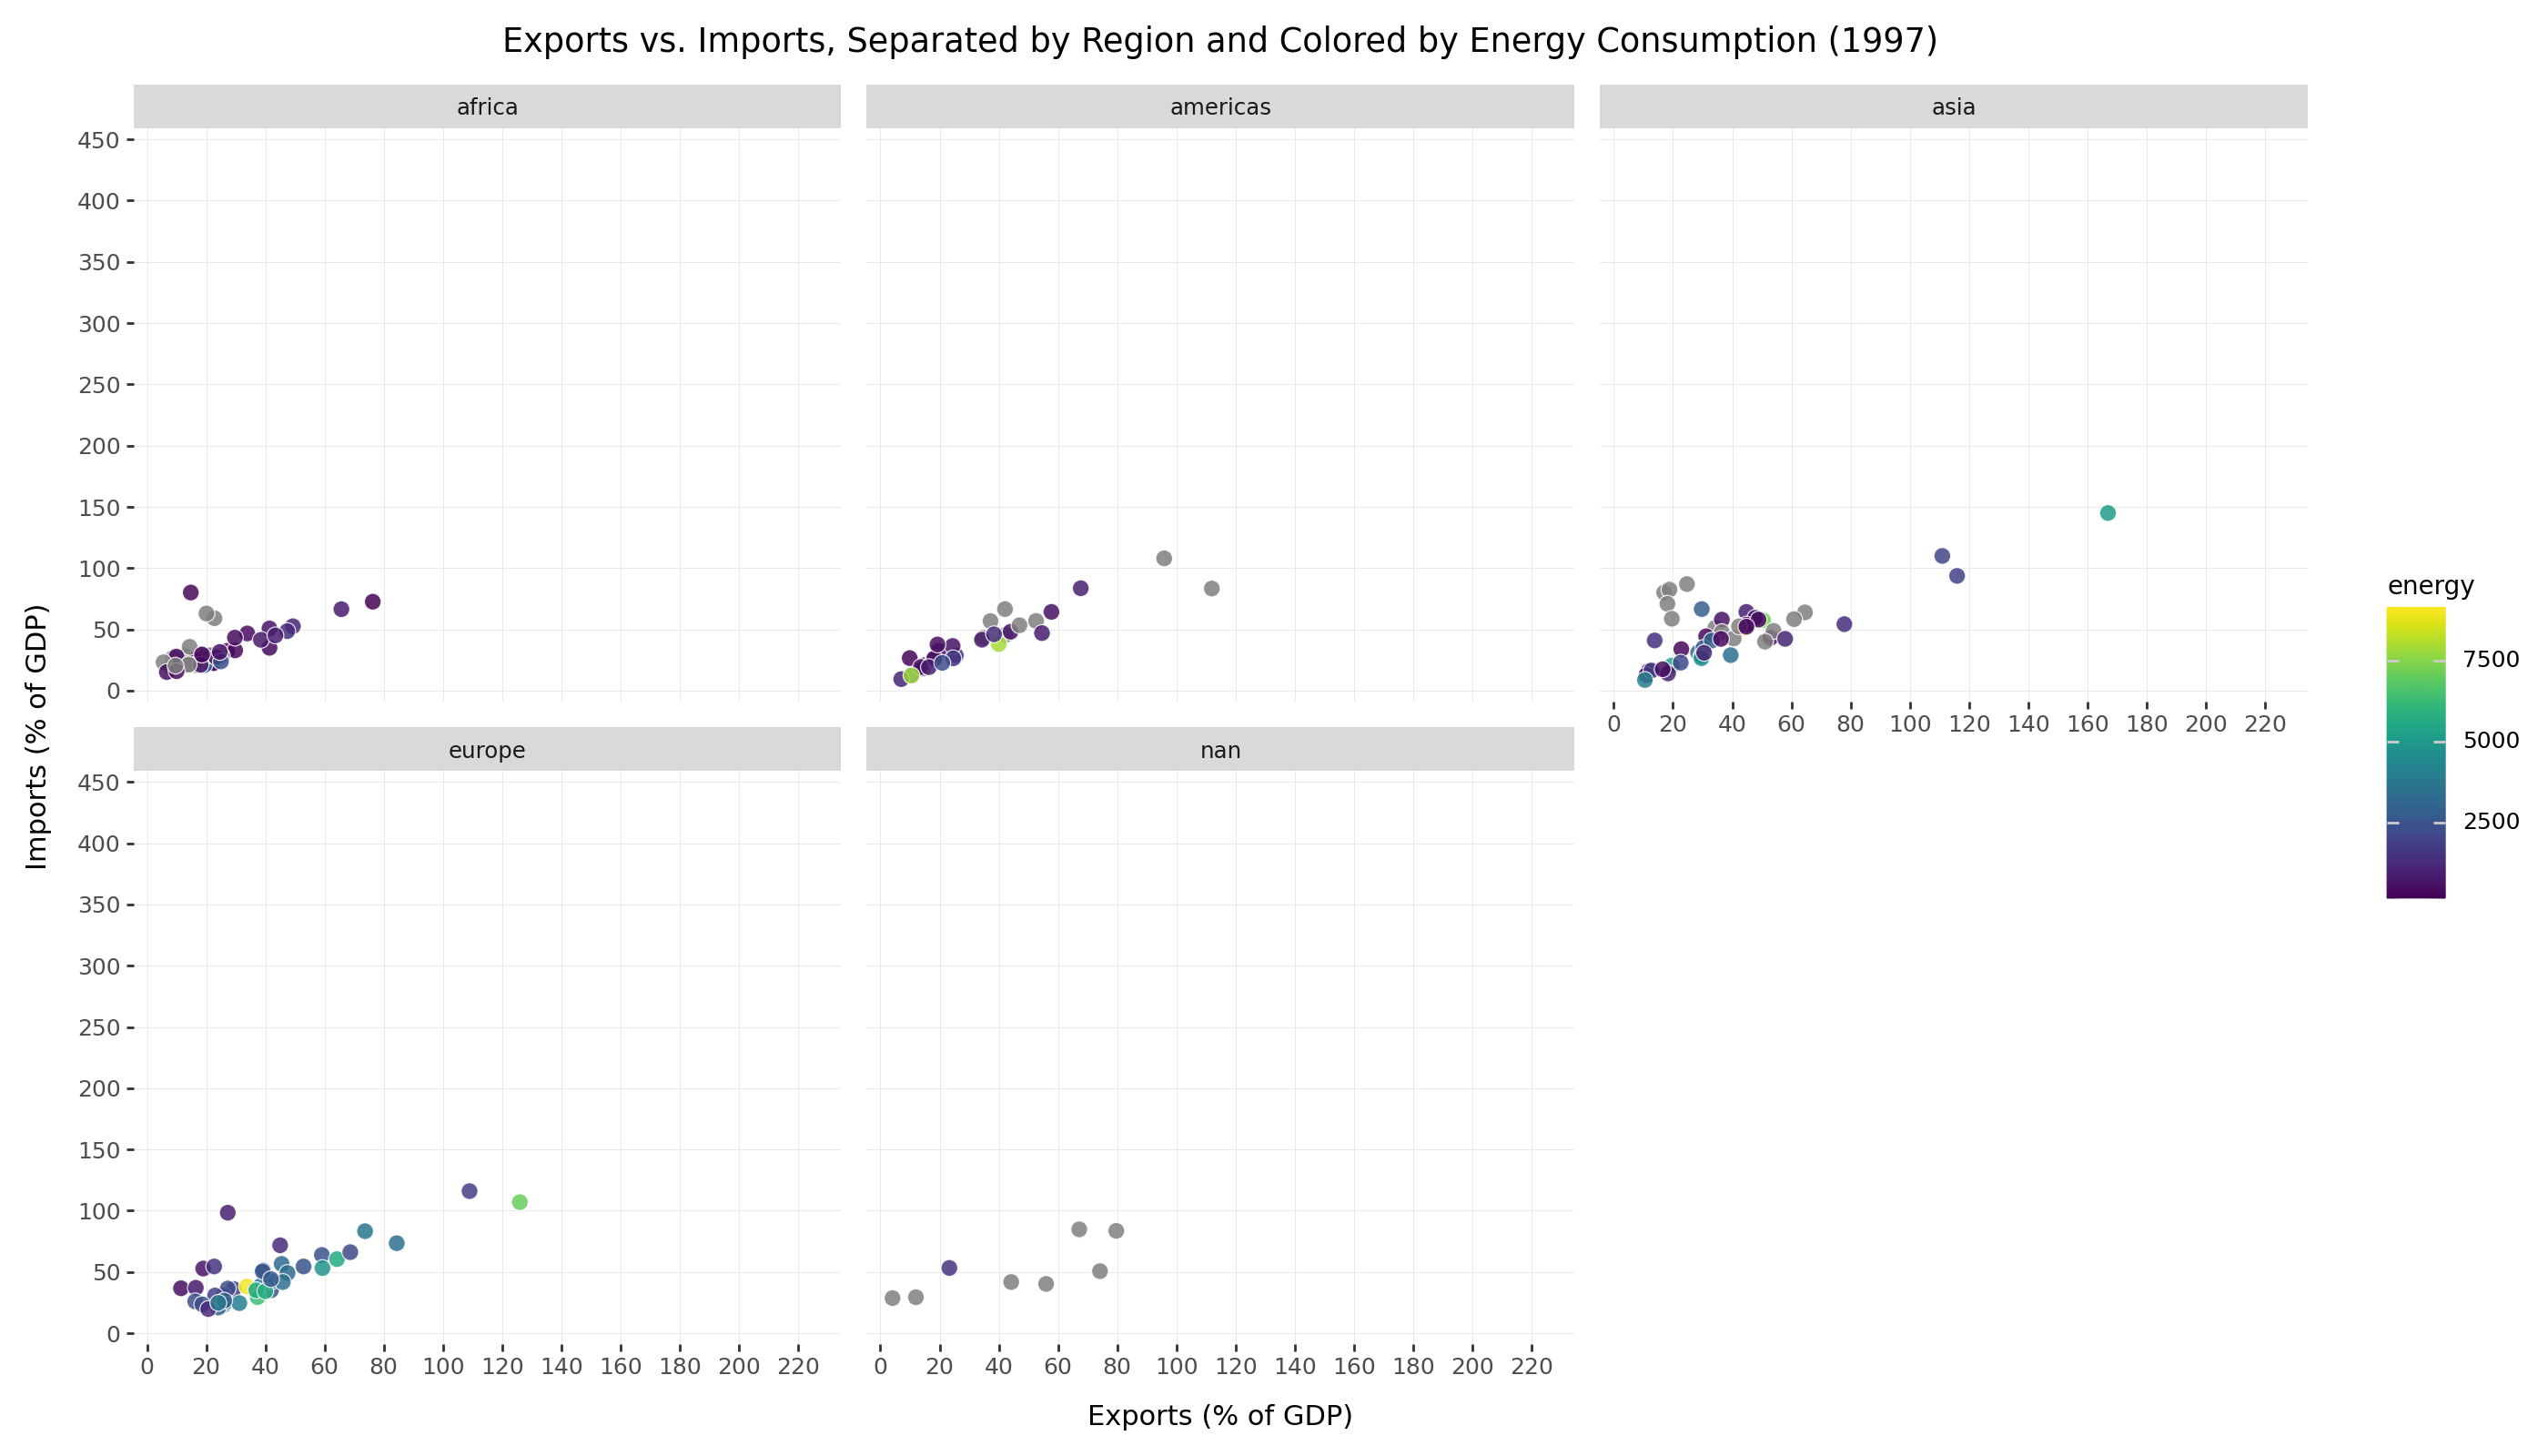

In [29]:
plotAlternative = (
    p9.ggplot(q2D, p9.aes(x="exports", y="imports")) # Removed 'size' aesthetic

    # Use geom_point, mapping 'energy' to the color aesthetic
    + p9.geom_point(
        p9.aes(fill="energy"), # Color now represents Energy consumption
        size=3.5,              # Use a fixed, medium size for all points
        shape="o",
        color="white",          # Set fill to white or remove it if using 'color'
        stroke=0.25,
        alpha=0.85
    )

    # Facet the plot by the 'four_regions' variable
    # This separates the data into four small, clean scatter plots
    + p9.facet_wrap("four_regions")

    # Use a sequential color scale for the 'energy' variable
    + p9.scale_color_cmap(
        cmap_name='viridis',
        limits=(0, q2D['energy'].max()),
        breaks=[0, 1000, 2000, 3000, 4000],
        name='Energy\n(kg oil equiv. per capita)'
        )
    
    # Removed p9.scale_fill_manual since 'fill' is no longer mapped to region

    + p9.labs(
        x="Exports (% of GDP)",
        y="Imports (% of GDP)",
        title="Exports vs. Imports, Separated by Region and Colored by Energy Consumption (1997)"
    )

    # Retain the continuous X axis
    + p9.scale_x_continuous(
        limits=(0, 230),
        breaks=[0,20,40,60,80,100,120,140,160,180,200,220],
        expand=(0.02, 0.02)
    )

    # Retain the continuous Y axis
    + p9.scale_y_continuous(
        limits=(0, 450),
        breaks=[0,50,100,150,200,250,300,350,400,450],
        expand=(0.02, 0.02)
    )

    # Simplify theme
    + p9.theme(
        figure_size=(14, 8), # Adjusted size to fit facets well
        panel_background=p9.element_rect(fill="white"),
        panel_grid_major=p9.element_line(color="#e6e6e6", size=0.3),
        panel_grid_minor=p9.element_blank(),
        axis_title=p9.element_text(size=11),
        axis_text=p9.element_text(size=9),
        # Removed text annotation for cleanliness
        legend_title=p9.element_text(size=10),
        legend_text=p9.element_text(size=9)
    )
)

plotAlternative.show()

### Good
Energy as color works well, and faceting makes trade patterns clearer within each region.

### Bad 
You lose the quick “region color” comparison across the globe, and energy’s skew means the color scale may not be balanced. Still a reasonable alternative.

# Task 3

In [30]:
print(q3D.dtypes)

print(q3D.head)

internet_users       float64
gdp                  float64
income               float64
year                   int64
country               object
four_regions          object
six_regions           object
eight_regions         object
world_bank_region     object
dtype: object
<bound method NDFrame.head of      internet_users      gdp   income  year                country  \
0           0.00456    330.0   1190.0  2001            Afghanistan   
1           0.39000   2570.0   6780.0  2001                Albania   
2           1.59000   3770.0   9230.0  2001                Algeria   
3               NaN  10500.0      NaN  2001         American Samoa   
4          11.30000  42600.0  35600.0  2001                Andorra   
..              ...      ...      ...   ...                    ...   
210         1.85000    847.0   3270.0  2001                Vietnam   
211        27.50000  36700.0      NaN  2001  Virgin Islands (U.S.)   
212         0.51900   1190.0   4940.0  2001                  Yeme

C:\Users\navsa\AppData\Local\Programs\Python\Python313\Lib\site-packages\plotnine\layer.py:372: PlotnineWarning: geom_point : Removed 32 rows containing missing values.


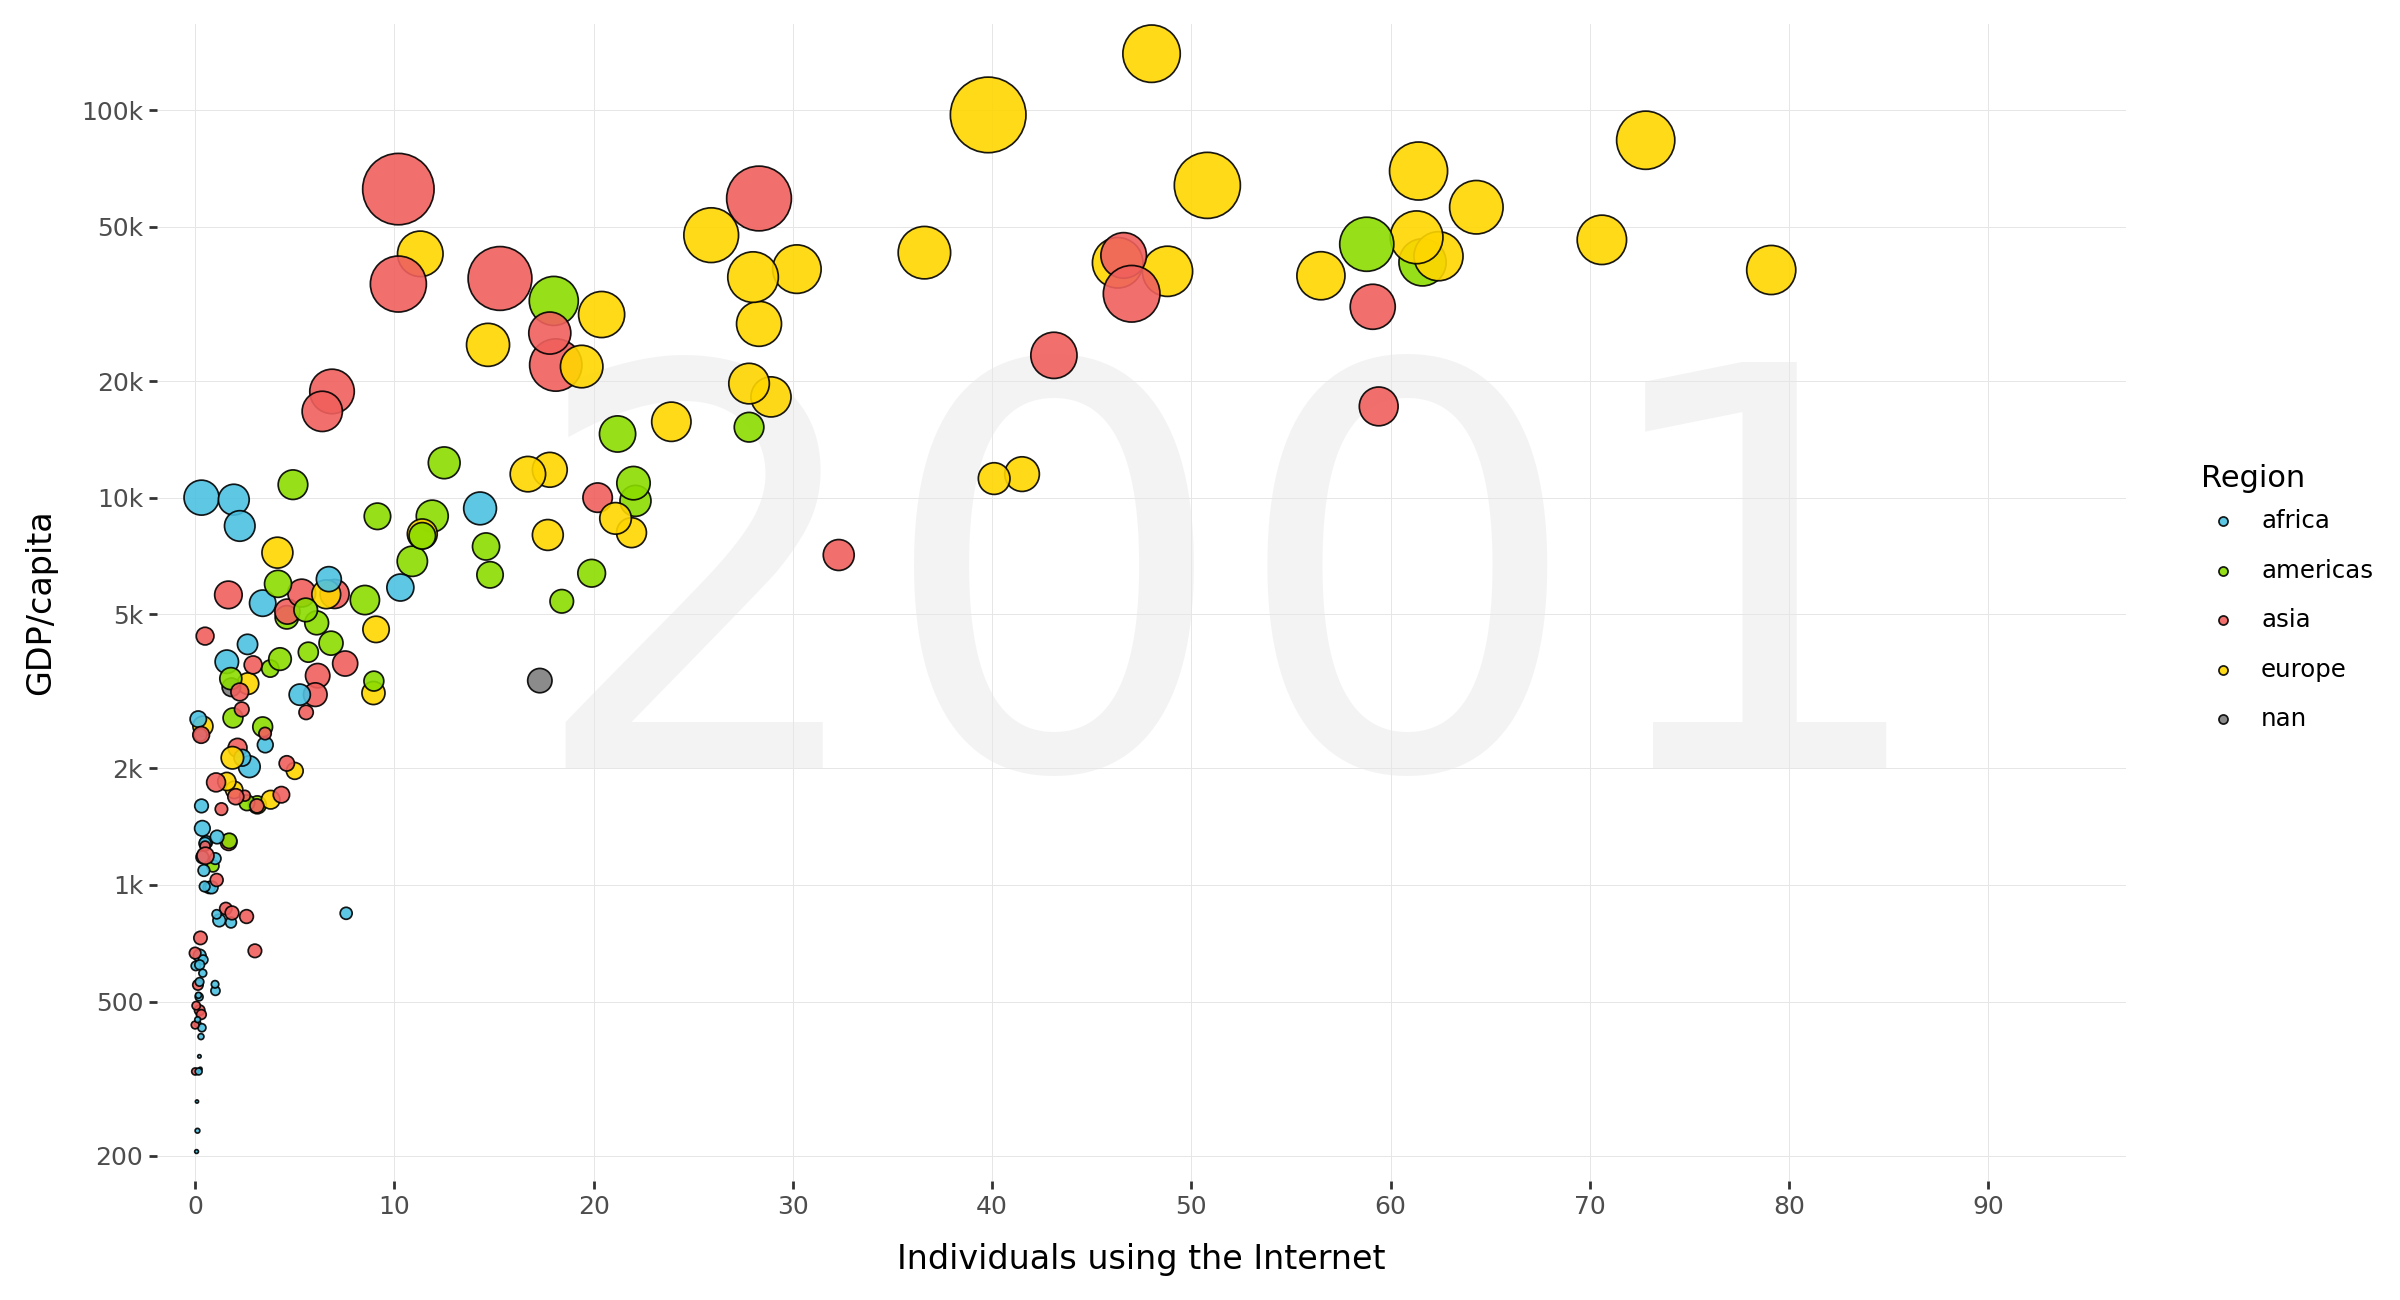

In [31]:
plotBubble = (
    p9.ggplot(q3D, p9.aes(x="internet_users", y="gdp", size="income"))
     # watermark year
    + p9.annotate(
        "text", x=52, y=5000, label="2001",
        size=200, color="#e6e6e6", alpha=0.45, ha="center", va="center"
    )
    + p9.geom_point(
        p9.aes(fill="four_regions"),
        shape="o",
        color="black",      # outline
        stroke=0.35,
        alpha=0.9
    )
    # colors & bubble sizing
    + p9.scale_size_area(max_size=15)
    + p9.guides(size=False)
    + p9.scale_fill_manual(values={
        "asia":    "#f0605d",  # coral red
        "europe":  "#ffd600",  # bright yellow
        "americas":"#8bdc00",  # lime green
        "africa":  "#4cc1e2"   # cyan blue
    })
    # axes: x in %, y log10 with “Gapminder-like” breaks
    + p9.scale_x_continuous(
        limits=(0, 95),
        breaks=list(range(0, 100, 10)),
        expand=(0.02, 0.02)
    )
    + p9.scale_y_log10(
        breaks=[200, 500, 1000, 2000, 5000, 10000, 20000, 50000, 100000],
        labels=["200", "500", "1k", "2k", "5k", "10k", "20k", "50k", "100k"],
        expand=(0.02, 0.02)
    )

   

    + p9.labs(
        x="Individuals using the Internet",
        y="GDP/capita",
        fill="Region"
    )
    + p9.theme(
        figure_size=(12, 6.5),
        panel_background=p9.element_rect(fill="white"),
        panel_grid_major=p9.element_line(color="#e6e6e6", size=0.35),
        panel_grid_minor=p9.element_blank(),
        axis_title=p9.element_text(size=12),
        axis_text=p9.element_text(size=9),
        legend_position="right",
    )
)

plotBubble.show()

C:\Users\navsa\AppData\Local\Programs\Python\Python313\Lib\site-packages\plotnine\layer.py:372: PlotnineWarning: geom_point : Removed 25 rows containing missing values.


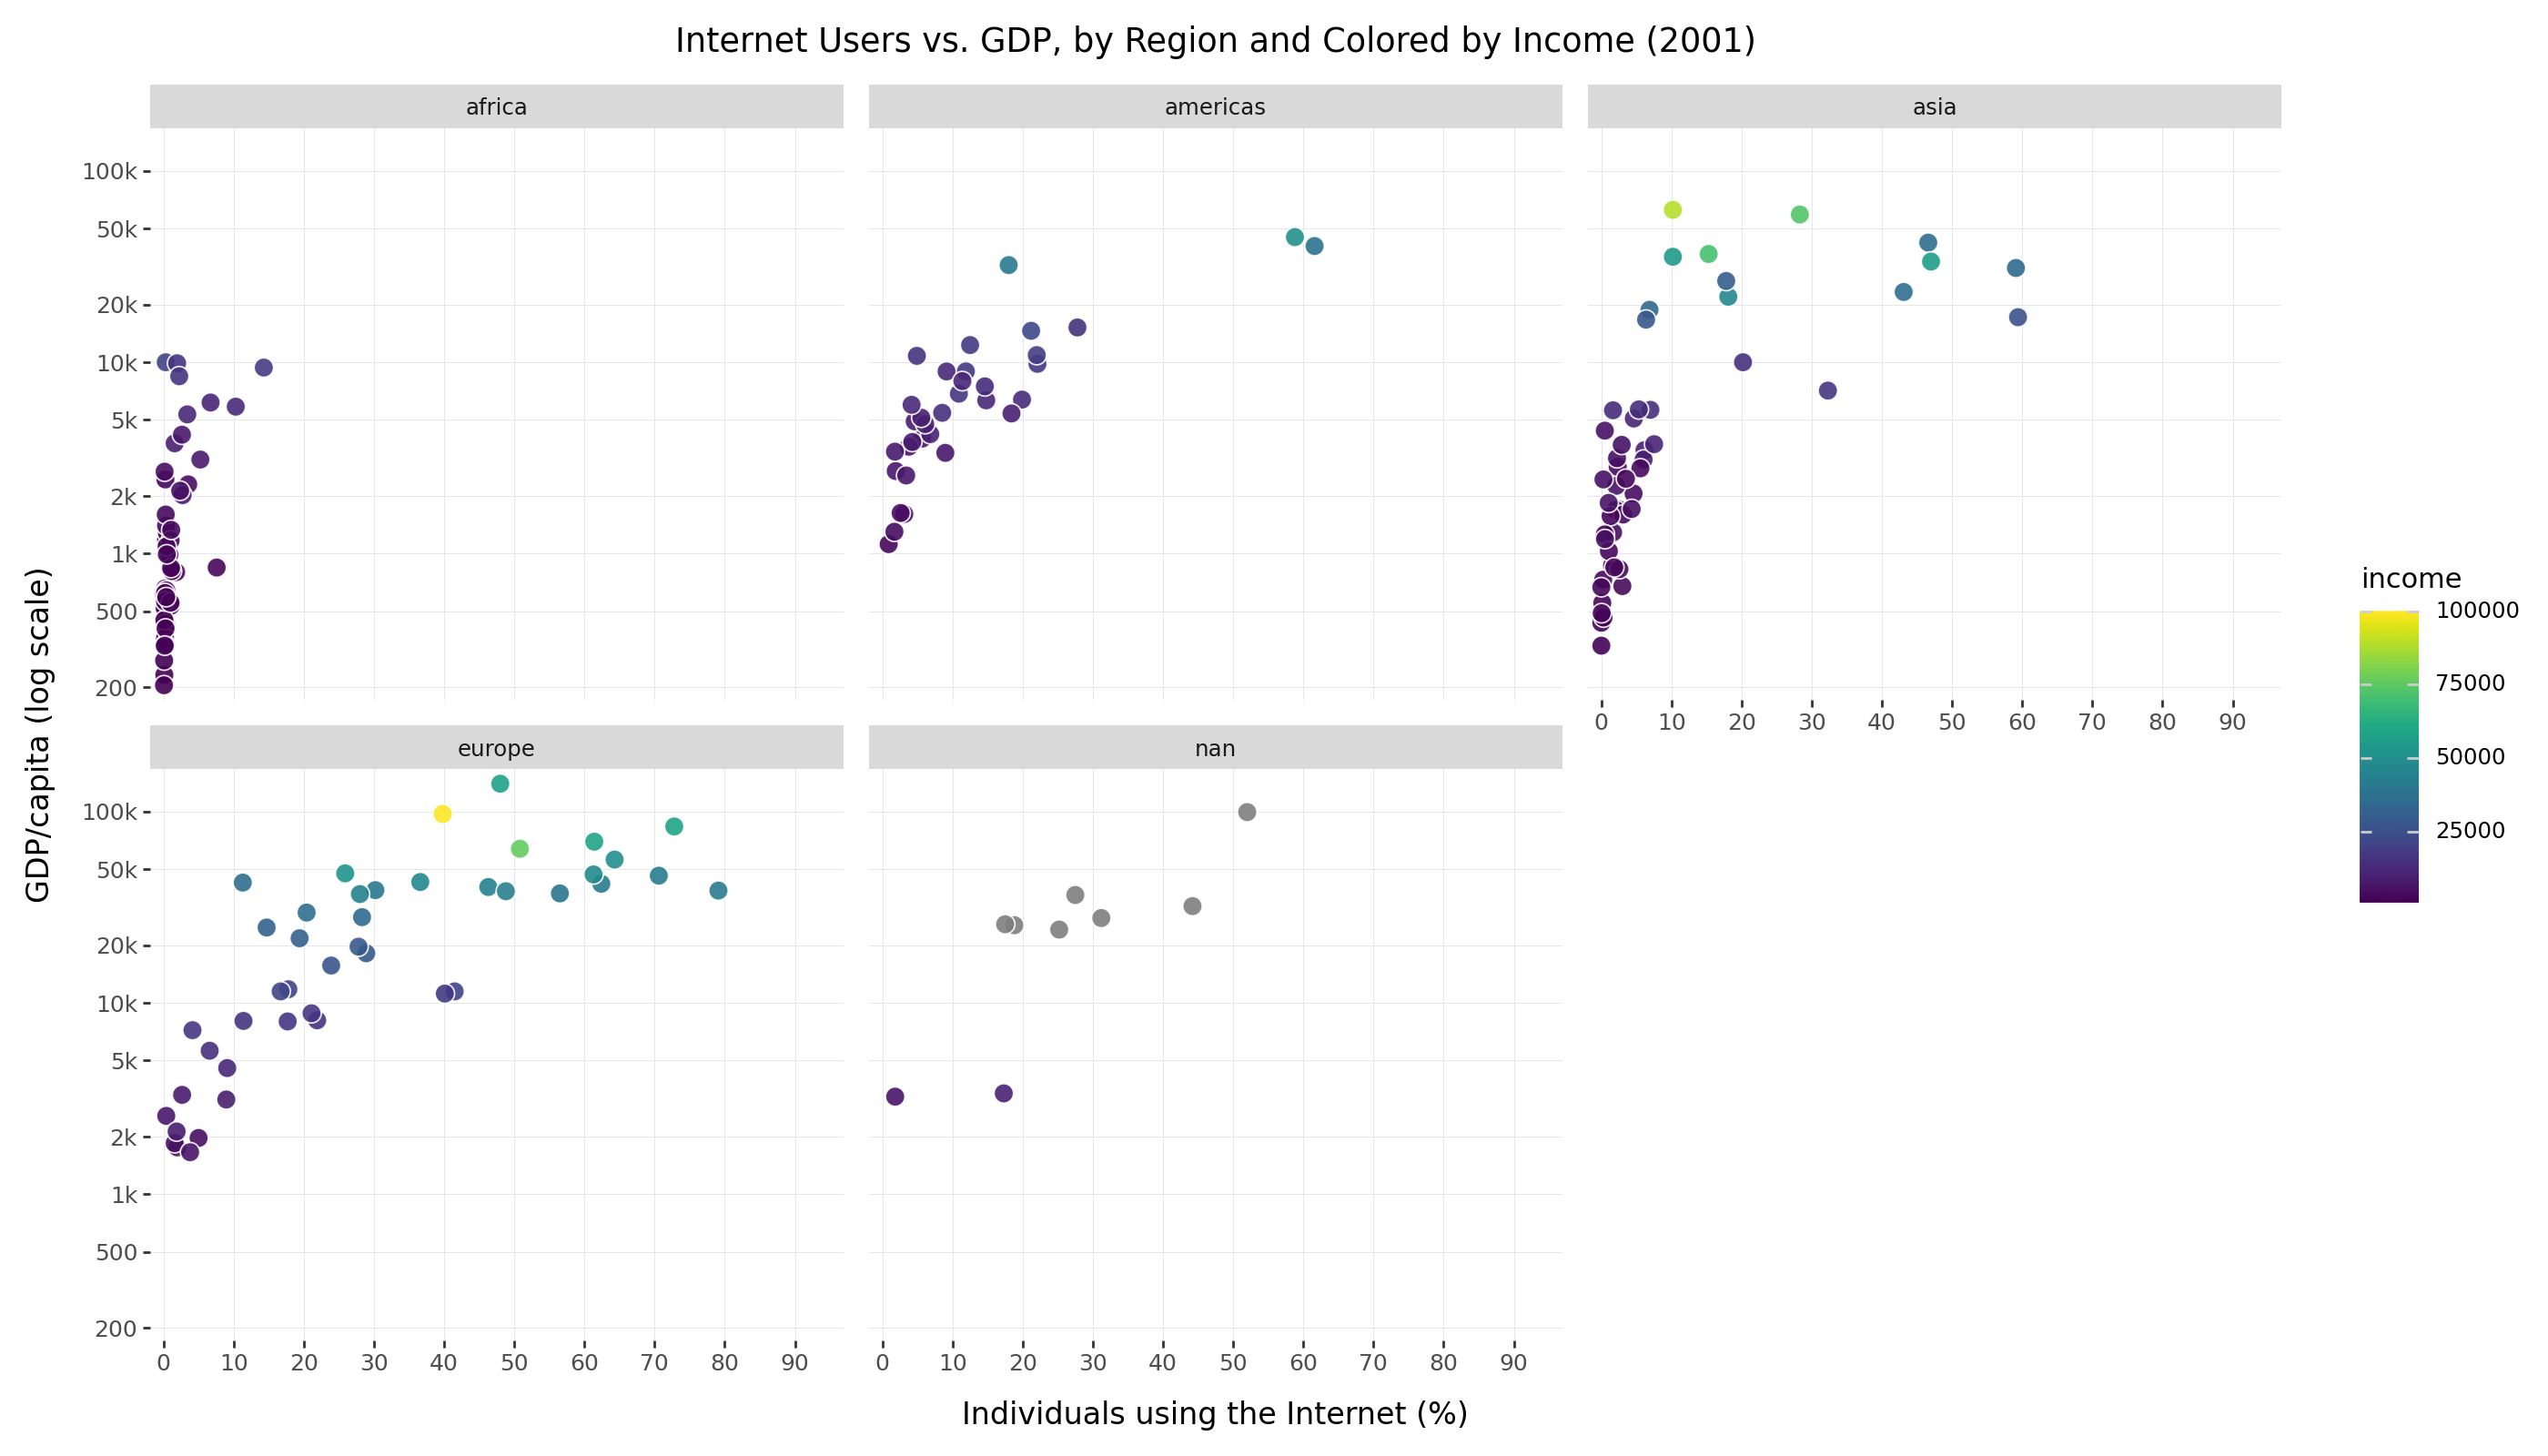

In [32]:
plotAlternative = (
    p9.ggplot(q3D, p9.aes(x="internet_users", y="gdp"))

    # Use geom_point, mapping 'income' to the color aesthetic
    + p9.geom_point(
        p9.aes(fill="income"), # Color now represents Income
        size=4,                # Use a fixed, medium size for all points
        shape="o",
        color="white",
        stroke=0.35,
        alpha=0.9
    )

    # Facet the plot by the 'four_regions' variable
    + p9.facet_wrap("four_regions")

    # Use a sequential color scale for the 'income' variable
    + p9.scale_color_cmap(
        cmap_name='plasma',  # Another perceptually uniform, colorblind-friendly map
        limits=(q3D['income'].min(), q3D['income'].max()),
        name='Income\n(USD per capita)'
    )
    
    + p9.labs(
        x="Individuals using the Internet (%)",
        y="GDP/capita (log scale)",
        title="Internet Users vs. GDP, by Region and Colored by Income (2001)"
    )

    # Retain the continuous X axis
    + p9.scale_x_continuous(
        limits=(0, 95),
        breaks=list(range(0, 100, 10)),
        expand=(0.02, 0.02)
    )

    # Retain the log-scaled Y axis
    + p9.scale_y_log10(
        breaks=[200, 500, 1000, 2000, 5000, 10000, 20000, 50000, 100000],
        labels=["200", "500", "1k", "2k", "5k", "10k", "20k", "50k", "100k"],
        expand=(0.02, 0.02)
    )
    
    # Simplify theme
    + p9.theme(
        figure_size=(14, 8),
        panel_background=p9.element_rect(fill="white"),
        panel_grid_major=p9.element_line(color="#e6e6e6", size=0.35),
        panel_grid_minor=p9.element_blank(),
        axis_title=p9.element_text(size=12),
        axis_text=p9.element_text(size=9),
        legend_position="right",
    )
)

plotAlternative.show()

### Good
Clean, easy to read, and facets reduce clutter.

### Bad
But income and GDP are basically the same story, so you’re double-encoding wealth. Color would be better used for something different (like population or income groups).

## AI Assistance

I consulted ChatGPT (OpenAI) step-by-step to refine plotting choices and debug code. I verified all outputs and made the final decisions.
